# MSiA 400 - Final Project
## Feature engineering for final aggregated data
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Cheng

Import necessary packages

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Establish connections to the database

In [2]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='ycj6475', 
                            password='White001!', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df = pd.read_sql("select * from \"aggtrnsact\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


PostgreSQL connection is closed


check the shape of total revenue column, no trend oe seasonality found

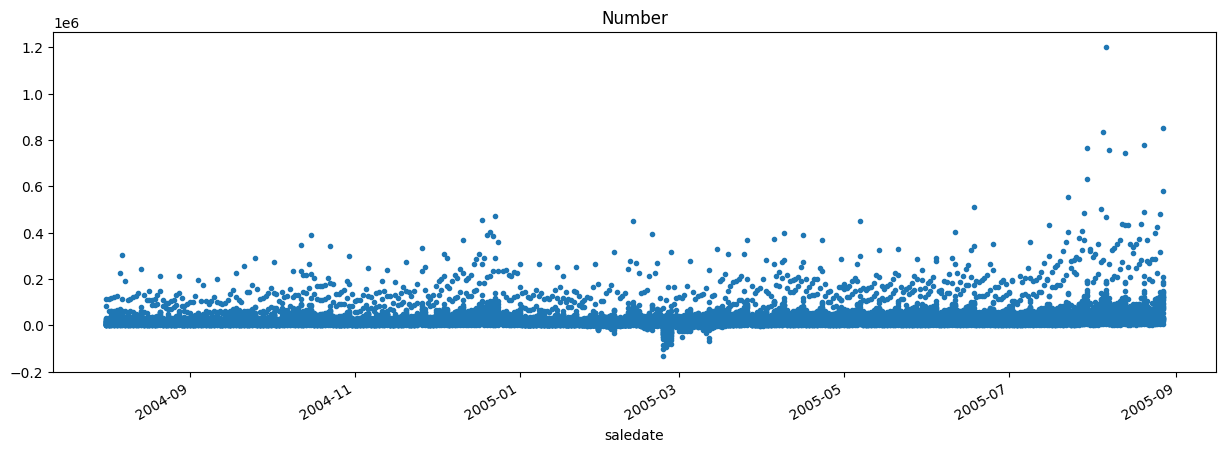

In [3]:
df_groupyed = df
color_pal = sns.color_palette()
# set df index as date
df_ts = df_groupyed.set_index('saledate')
df_ts.index = pd.to_datetime(df_ts.index)
# check distribution of revenue (no pattern found)
df_ts_draw = df_ts["totalprofit"]
df_ts_draw.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Number')
plt.show()


In [4]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df

# create time series features
df_ts = create_features(df_ts)
df_ts

,state,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,avgorigprice,...,ncities,ndept,nvendors,avgvendorsstore,hour,dayofweek,quarter,month,year,dayofmonth
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,AL,4016,4832,61,154686.64,1983.162051,0.0,650.0,112570.29,23.296832,...,10,56,411,34,0,6,3,8,2004,1
2004-08-01,AR,2923,3692,46,124112.38,1571.042785,0.0,895.0,99210.52,26.871755,...,7,57,384,54,0,6,3,8,2004,1
2004-08-01,AZ,6710,9272,83,282876.15,2548.433784,0.0,650.0,226252.94,24.401741,...,10,58,449,32,0,6,3,8,2004,1
2004-08-01,CA,1054,1174,13,40297.12,457.921818,0.0,425.0,30868.73,26.293637,...,2,53,249,124,0,6,3,8,2004,1
2004-08-01,CO,4062,5295,56,165998.81,1784.933441,0.0,895.0,122559.93,23.146351,...,9,58,381,34,0,6,3,8,2004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-27,TN,19319,28464,121,1204982.36,5127.584511,0.0,788.0,578953.01,20.339833,...,10,60,586,41,0,5,3,8,2005,27
2005-08-27,TX,62545,156933,458,6627749.79,19379.385351,0.0,1200.0,3189055.04,20.321125,...,46,60,802,14,0,5,3,8,2005,27
2005-08-27,UT,8985,12166,76,422610.82,2657.929686,0.0,695.0,220702.78,18.140949,...,6,56,467,77,0,5,3,8,2005,27


In [5]:
orignal_features = list(df.columns)
orignal_features.remove('saledate')
orignal_features

['state',
 'nsku',
 'totalquantity',
 'avgquantity',
 'totalamt',
 'avgamt',
 'minamt',
 'maxamt',
 'totalorigprice',
 'avgorigprice',
 'minorigprice',
 'maxorigprice',
 'totalretail',
 'avgretail',
 'minretail',
 'maxretail',
 'avgretailtrnsact',
 'totalcost',
 'avgcost',
 'mincost',
 'maxcost',
 'avgcosttrnsact',
 'totaldiscount',
 'avgdiscounttrnsact',
 'mindiscount',
 'maxdiscount',
 'totalprofit',
 'avgprofittrnsact',
 'minprofit',
 'maxprofit',
 'nstore',
 'ncities',
 'ndept',
 'nvendors',
 'avgvendorsstore']

In [6]:
# TODO: add lags
def create_lag_feature(df, column):
    '''
    Create time lagging features
    '''
    df = df.copy()
    df[column + '_1'] = df[column].shift(1)
    df[column + '_2'] = df[column].shift(2)
    df[column + '_3'] = df[column].shift(3)
    df[column + '_4'] = df[column].shift(4)
    df[column + '_5'] = df[column].shift(5)
    df[column + '_6'] = df[column].shift(6)
    df[column + '_7'] = df[column].shift(7)
    df[column + '_14'] = df[column].shift(14)
    df[column + '_28'] = df[column].shift(28)
    return df

orignal_features = list(df.columns)
orignal_features.remove('saledate')
orignal_features.remove('state')

for col in orignal_features:
    df_ts = create_lag_feature(df_ts, col)


df_model = pd.DataFrame(columns = df_ts.columns)
for state in df_ts['state'].drop_duplicates().tolist():
    df_part = df_ts[df_ts['state']==state]
    for col in orignal_features:
        df_part = create_lag_feature(df_part, col)
    df_model = pd.concat([df_model, df_part])


df_model




,state,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,avgorigprice,...,nvendors_28,avgvendorsstore_1,avgvendorsstore_2,avgvendorsstore_3,avgvendorsstore_4,avgvendorsstore_5,avgvendorsstore_6,avgvendorsstore_7,avgvendorsstore_14,avgvendorsstore_28
2004-08-01,AL,4016,4832,61,154686.64,1983.162051,0.0,650.0,112570.29,23.296832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,AL,4539,5730,42,177630.18,1325.598358,0.0,595.0,130580.11,22.788850,...,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-03,AL,5165,6556,51,203399.34,1589.057344,0.0,595.0,147526.72,22.502550,...,NaN,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-04,AL,5008,6331,50,199944.96,1599.559680,0.0,595.0,142912.21,22.573402,...,NaN,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-05,AL,5285,6681,50,213268.97,1615.674015,0.0,695.0,149751.38,22.414516,...,NaN,37.0,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,WY,453,509,15,12950.74,404.710625,0.0,159.0,9171.74,18.019136,...,158.0,154.0,161.0,201.0,179.0,162.0,163.0,158.0,140.0,158.0
2005-08-24,WY,917,990,14,31830.29,461.308551,0.0,595.0,15217.16,15.370869,...,214.0,146.0,154.0,161.0,201.0,179.0,162.0,163.0,144.0,214.0
2005-08-25,WY,841,940,13,30399.62,434.280286,0.0,495.0,13918.61,14.807032,...,242.0,216.0,146.0,154.0,161.0,201.0,179.0,162.0,171.0,242.0
2005-08-26,WY,1098,1195,15,36792.64,477.826494,0.0,240.0,17990.24,15.054594,...,208.0,199.0,216.0,146.0,154.0,161.0,201.0,179.0,171.0,208.0


In [7]:
orignal_features.remove('totalprofit')
df_ts_lagged = df_model.drop(orignal_features, axis=1)
df_ts_lagged

,state,totalprofit,hour,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,...,nvendors_28,avgvendorsstore_1,avgvendorsstore_2,avgvendorsstore_3,avgvendorsstore_4,avgvendorsstore_5,avgvendorsstore_6,avgvendorsstore_7,avgvendorsstore_14,avgvendorsstore_28
2004-08-01,AL,11758.40,0,6,3,8,2004,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,AL,15419.20,0,0,3,8,2004,2,4016.0,NaN,...,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-03,AL,15937.70,0,1,3,8,2004,3,4539.0,4016.0,...,NaN,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-04,AL,14726.50,0,2,3,8,2004,4,5165.0,4539.0,...,NaN,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-05,AL,15885.70,0,3,3,8,2004,5,5008.0,5165.0,...,NaN,37.0,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,WY,2881.74,0,1,3,8,2005,23,432.0,478.0,...,158.0,154.0,161.0,201.0,179.0,162.0,163.0,158.0,140.0,158.0
2005-08-24,WY,5055.26,0,2,3,8,2005,24,453.0,432.0,...,214.0,146.0,154.0,161.0,201.0,179.0,162.0,163.0,144.0,214.0
2005-08-25,WY,3755.03,0,3,3,8,2005,25,917.0,453.0,...,242.0,216.0,146.0,154.0,161.0,201.0,179.0,162.0,171.0,242.0
2005-08-26,WY,6096.00,0,4,3,8,2005,26,841.0,917.0,...,208.0,199.0,216.0,146.0,154.0,161.0,201.0,179.0,171.0,208.0


In [8]:
# one hot encoding for state variable
df_ts_lagged = pd.get_dummies(df_ts_lagged)
df_ts_lagged.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11281 entries, 2004-08-01 to 2005-08-27
Columns: 393 entries, totalprofit to dayofmonth_31
dtypes: float64(307), uint8(86)
memory usage: 27.4 MB


/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
